In [ ]:
import numpy as np
import random
%matplotlib inline
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d



x = [[1., 0., 0.],[1., 0., 1.], [1., 1., 0.],[1., 1., 1.]]

y =[1.0,1.0,1.0,0.0]



w=np.ones(3)
for i in range(len(w)):
  w[i]=random.random()*w[i]


print(w)
e=0.2

for k in range(120):
  m=random.choice([0,1,2,3])
  # print(np.dot(w,x[m])) 
  if y[m]>0 and np.dot(w,x[m])<0:
    
    w=w+np.multiply(e,x[m])
  elif y[m]<=0 and  np.dot(w,x[m])>=0:
    w=w-np.multiply(e,x[m])
     
  print(w) 




    



[0.06557568 0.5870729  0.67029632]
[0.06557568 0.5870729  0.67029632]
[0.06557568 0.5870729  0.67029632]
[0.06557568 0.5870729  0.67029632]
[-0.13442432  0.3870729   0.47029632]
[-0.13442432  0.3870729   0.47029632]
[-0.13442432  0.3870729   0.47029632]
[-0.13442432  0.3870729   0.47029632]
[-0.13442432  0.3870729   0.47029632]
[0.06557568 0.3870729  0.47029632]
[0.06557568 0.3870729  0.47029632]
[0.06557568 0.3870729  0.47029632]
[-0.13442432  0.1870729   0.27029632]
[-0.13442432  0.1870729   0.27029632]
[-0.13442432  0.1870729   0.27029632]
[-0.13442432  0.1870729   0.27029632]
[-0.13442432  0.1870729   0.27029632]
[-0.13442432  0.1870729   0.27029632]
[-0.13442432  0.1870729   0.27029632]
[-0.33442432 -0.0129271   0.07029632]
[-0.33442432 -0.0129271   0.07029632]
[-0.13442432 -0.0129271   0.27029632]
[-0.33442432 -0.2129271   0.07029632]
[-0.33442432 -0.2129271   0.07029632]
[-0.33442432 -0.2129271   0.07029632]
[-0.13442432 -0.0129271   0.07029632]
[-0.13442432 -0.0129271   0.07029

Pertron Algorithm for MNIST and XOR dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from util import get_data as get_mnist
from datetime import datetime

#Code for getting simple MNIST data

def get_mnist(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('/content/sample_data/mnist_train_small.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y


In [ ]:
def get_data():
    w = np.array([-0.5, 0.5])
    b = 0.1
    X = np.random.random((300, 2))*2 - 1
    Y = np.sign(X.dot(w) + b)
    return X, Y


def get_simple_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    return X, Y

In [ ]:
class Perceptron:
    def fit(self, X, Y, learning_rate=1.0, epochs=1000):
        # solution
        # self.w = np.array([-0.5, 0.5])
        # self.b = 0.1

        # initialize random weights
        D = X.shape[1]
        self.w = np.random.randn(D)
        self.b = 0

        N = len(Y)
        costs = []
        for epoch in range(epochs):
            # determine which samples are misclassified, if any
            Yhat = self.predict(X)
            incorrect = np.nonzero(Y != Yhat)[0]
            if len(incorrect) == 0:
                # we are done!
                break

            # choose a random incorrect sample
            i = np.random.choice(incorrect)
            self.w += learning_rate*Y[i]*X[i]
            self.b += learning_rate*Y[i]

            # cost is incorrect rate
            c = len(incorrect) / float(N)
            costs.append(c)
        print("final w:", self.w, "final b:", self.b, "epochs:", (epoch+1), "/", epochs)
        plt.plot(costs)
        plt.show()

    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

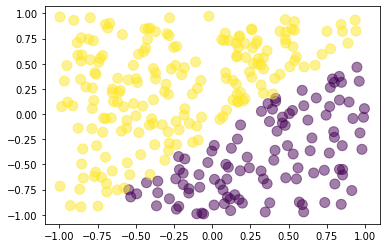

final w: [-14.20608367  14.52793947] final b: 3.0 epochs: 638 / 1000


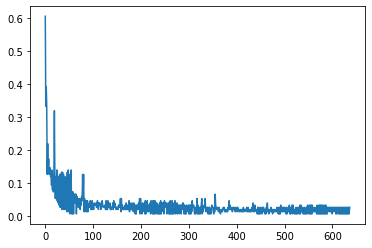

Training time: 0:00:00.162872
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.000179 Train size: 150
Test accuracy: 1.0
Time to compute test accuracy: 0:00:00.000091 Test size: 150
Reading in and transforming data...
final w: [-3.66266896e-01  5.84382407e-01  1.41263698e+00  1.10126159e+00
  8.54306429e-01  3.80255214e-01  7.09689256e-01 -4.50248156e-01
 -1.73179965e+00  3.82227941e-02  3.86020325e-01  1.81319505e-01
 -4.45056278e-01  1.33532015e+00  1.95009207e-01 -6.39675285e-02
  1.91097625e+00 -8.00700720e-01 -4.14267243e-01  8.51476048e-01
 -8.35286974e-01  3.05236495e-01 -4.09738495e-02  8.39851595e-01
  5.61200124e-01 -4.12575911e-01  1.25456890e+00 -8.45709141e-01
 -5.52569187e-01 -1.65845137e+00 -9.22512252e-01 -4.50338022e-01
 -1.46504244e+00 -2.55108667e-01 -2.84825590e-01 -1.30521295e+00
  1.79868907e+00  2.68689441e-01 -5.01825273e-02 -7.69991447e-01
 -9.66031134e-01  2.73772375e+00  2.29324683e-02 -8.31699154e-01
  1.44814513e+00 -7.48386079e-01 -1.86850709e+0

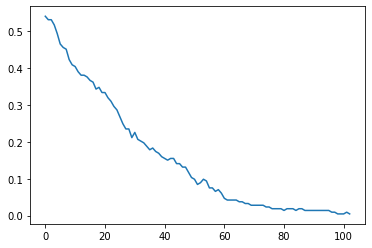

MNIST train accuracy: 1.0

XOR results:
final w: [0.17817151 1.35299821] final b: 0.0 epochs: 1000 / 1000


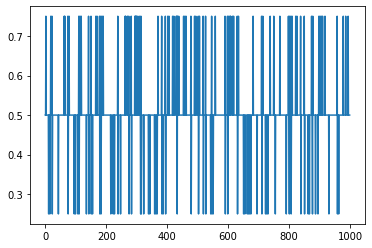

XOR accuracy: 0.5


In [ ]:
import pandas as pd

if __name__ == '__main__':
    # linearly separable data
    X, Y = get_data()
    plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
    plt.show()
    Ntrain = len(Y) // 2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

    model = Perceptron()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))


    # mnist
    X, Y = get_mnist(1000)
    idx = np.logical_or(Y == 0, Y == 1)
    X = X[idx]
    Y = Y[idx]
    # Ntrain=700
    # Xtrain1, Ytrain1 = X[:Ntrain], Y[:Ntrain]
    # Xtest1, Ytest1 = X[Ntrain:], Y[Ntrain:]
    Y[Y == 0] = -1
    model = Perceptron()
    t0 = datetime.now()
    model.fit(X, Y, learning_rate=1e-2)
    print("MNIST train accuracy:", model.score(X, Y))
    # print("Test accuracy:", model.score(Xtest1, Ytest1))


    # xor data
    print("")
    print("XOR results:")
    X, Y = get_simple_xor()
    Y[Y == 0] = -1
    model.fit(X, Y)
    print("XOR accuracy:", model.score(X, Y))